In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
data = pd.read_csv ('datasets/wine.csv')
# data = pd.read_csv ('datasets/credit.csv')
data.head(13)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [30]:
# sns.pairplot(data, hue="class")

In [31]:
from sklearn.preprocessing import OrdinalEncoder
#Encode all
# pd.DataFrame(data=OrdinalEncoder().fit_transform(data), columns=list(data.columns.values)).head(13)
data.select_dtypes(['object']).columns.values

array([], dtype=object)

In [32]:
X=data.iloc[:,:-1]
X.shape

(1599, 11)

In [33]:
y=data.iloc[:,-1]
y.shape

(1599,)

In [34]:
X.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

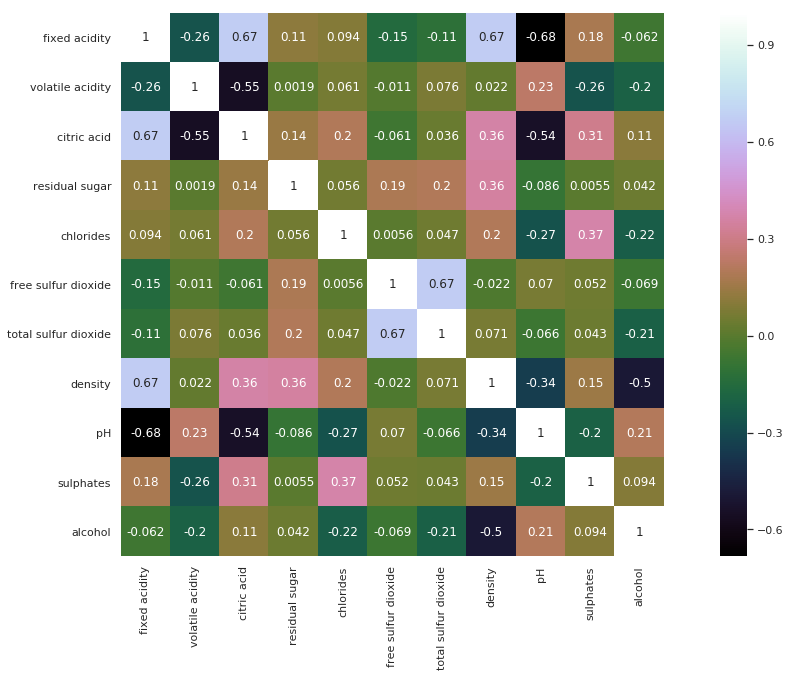

In [35]:
corr_mat=X.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

In [36]:
from sklearn.preprocessing import StandardScaler
X_std=StandardScaler().fit_transform(X.values)

Text(0,0.5,'Cumulative explained variance')

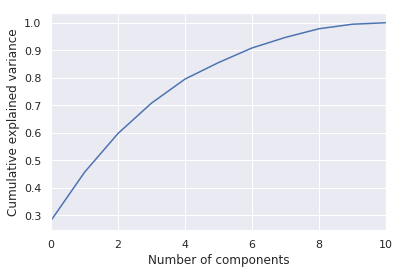

In [37]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,10,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [38]:
from sklearn.decomposition import PCA
sklearn_pca=PCA(n_components=8)
# X=sklearn_pca.fit_transform(X_std)
# X=X_std

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
import time
def toPercent(x):
    return "{:0.2f} %".format(x*100)
def toMS(x):
    return "{:0.2f} ms".format(x*1000)

def test_models(X,y,models):
    dfc=[]
    X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = .25)
    for model in models:
        start=time.time()
        clf=models[model].fit(X_train, y_train)
        train_acc=acc(clf.predict(X_train),y_train)
        test_acc=acc(clf.predict(X_test),y_test)
        timed=time.time()-start
        dfc.append([model, toPercent(train_acc), toPercent(test_acc),toMS(timed)])
    return pd.DataFrame(dfc,columns=['Classifier','Train Accuracy','Test Accuracy','Time Taken'])

In [40]:
from sklearn import tree
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
models={
    'Decision Tree 8' : tree.DecisionTreeClassifier(max_depth=5),
    'Naive Baes' : GaussianNB(),
    'KNN' : KNeighborsClassifier(6),
    'Support Vector Machine Linear' : SVC(kernel="linear", C=0.025),
    'Support Vector Machine Gamma' : SVC(gamma=2, C=1),
    'Random Forest':RandomForestClassifier(max_depth=10, n_estimators=400, max_features=10),
    'Logistic Regression':LogisticRegression()
}

In [41]:
test_models(X,y,models)

,Classifier,Train Accuracy,Test Accuracy,Time Taken
0,KNN,60.88 %,51.50 %,15.01 ms
1,Support Vector Machine Linear,58.55 %,54.75 %,270.26 ms
2,Decision Tree 8,67.89 %,53.75 %,5.29 ms
3,Naive Baes,57.13 %,53.00 %,4.14 ms
4,Logistic Regression,59.47 %,55.25 %,36.77 ms
5,Support Vector Machine Gamma,99.00 %,54.50 %,279.25 ms
6,Random Forest,96.16 %,65.25 %,2518.65 ms
